# Solutions to sheet 3

Import the necessary libraries: `numpy`, `matplotlib`. We can use the `as` keyword to define shortcuts to access the libraries (example: `import numpy as np` means we can access numpy functions with the `np.` syntax).

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.stats as stats

In [4]:
## - - - - - - - - - - - - - - - - - - - - - - - - - - -
##      plotting properties
## - - - - - - - - - - - - - - - - - - - - - - - - - - -

# import json
# with open("plt_rcparams.json", encoding="utf8") as sf:
#     mpl.rcParams.update(json.load(sf))

Fix some of the physics parameters we will use.

In [5]:
m_top = 173       # in GeV
gamma_top = 1.33  # in GeV

## Implement Cauchy and Gauss distributions

This implements a Cauchy distribution according to:

$$
f(x) = \frac{1}{\pi\gamma} \cdot \frac{\gamma^2}{(x - x_0)^2 + \gamma^2}
$$

In [6]:
def Cauchy(x, x_0, gamma):
    """Implementation of a Cauchy distribution.
    
    Args:
      x: the point at which to evaluate
      x_0: the central value of the distribution
      gamma: the half width at half maximum
    
    Returns:
      function evaluated at point x
    """
    pref = 1 / np.pi / gamma
    return pref * np.power(gamma, 2) / (np.power(x - x_0, 2) + np.power(gamma, 2))

This implements a Gauss distribution according to:

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot \exp \left( - \frac{(x - \mu)^2}{ 2 \sigma^2} \right)
$$

In [7]:
def Gauss(x, mu, sigma):
    """Implementation of a Gauss distribution.
    
    Args:
      x: the point at which to evaluate
      mu: the central value of the distribution
      sigma: the standard deviation of the distribution
    
    Returns:
      function evaluated at point x
    """
    pref = 1 / sigma / np.sqrt(2 * np.pi)
    return pref * np.exp(- np.power(x - mu, 2) / 2 / sigma / sigma)

## Plot the distribution

Let's plot 200 points in the interval $[170, 176]$.

In [8]:
n_points = 200
interval = (170, 176)

In [9]:
xfunc = np.linspace(*interval, n_points)

In [10]:
yfunc = Cauchy(xfunc, m_top, gamma_top/2)

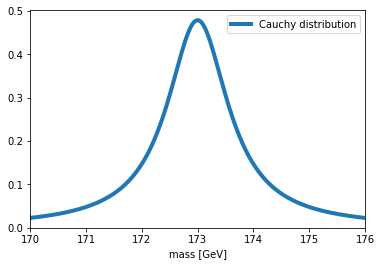

In [11]:
plt.plot(xfunc, yfunc, label="Cauchy distribution", lw=4)
plt.xlim(*interval)
plt.xlabel("mass [GeV]")
plt.legend()

plt.show()

## Accept-reject method

Use a random number generator to generate 2000 random points following a uniform distribution scaled with the pre-factor $0.3$.

In [12]:
gen = np.random.default_rng()

In [13]:
n_samples = 2000

In [14]:
x = gen.uniform(*interval, n_samples)

In [15]:
y = gen.uniform(0, 0.5, n_samples)

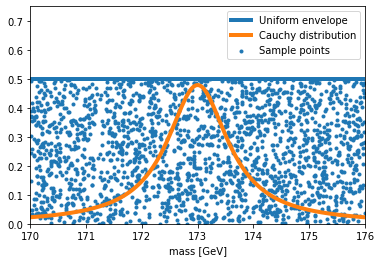

In [16]:
plt.plot(xfunc, np.full(n_points, 0.5), label="Uniform envelope", lw=4)
plt.scatter(x, y, label="Sample points", marker=".")
plt.plot(xfunc, yfunc, label="Cauchy distribution", lw=4)
plt.xlim(*interval)
plt.ylim([0, 0.75])
plt.xlabel("mass [GeV]")
plt.legend()

plt.show()

We cannot distinguish accepted and rejected points yet. So let's apply the Von Neumann criterion.

In [17]:
accepted = (y <= Cauchy(x, m_top, gamma_top/2))

In [18]:
x_accepted = x[accepted]
y_accepted = y[accepted]

In [19]:
x_rejected = x[np.invert(accepted)]
y_rejected = y[np.invert(accepted)]

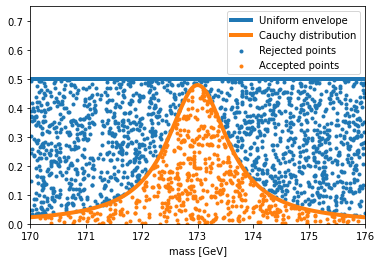

In [20]:
plt.plot(xfunc, np.full(n_points, 0.5), label="Uniform envelope", lw=4)
plt.plot(xfunc, yfunc, label="Cauchy distribution", lw=4)
plt.scatter(x_rejected, y_rejected, label="Rejected points", marker=".")
plt.scatter(x_accepted, y_accepted, label="Accepted points", marker=".")
plt.xlim(*interval)
plt.ylim([0, 0.75])
plt.xlabel("mass [GeV]")
plt.legend()

plt.show()

In [21]:
print("Acceptance rate: {}".format(len(x_accepted) / len(x)))

Acceptance rate: 0.2755


In [22]:
print("Integral: {}".format(len(x_accepted) / len(x) * 3))

Integral: 0.8265
